In [764]:
%run cv.ipynb

In [2]:
train = pd.read_csv(input_path + '/train_data.csv', sep=',')
test = pd.read_csv(input_path + '/test_data.csv', sep=',')
train_answers = pd.read_csv(input_path + '/train_answers.csv', sep=',')

In [3]:
len(train.userId.unique()), len(test.userId.unique()), len(np.intersect1d(train.userId.unique(), test.userId.unique()))

(1357, 1192, 1001)

In [4]:
tr = train.join(train_answers.set_index('itemId'), how='left', on='itemId')
tr['isMinmax'] = (tr.Xmin_true <= tr.Xmin) & (tr.Xmax <= tr.Xmax_true) & (tr.Ymin_true <= tr.Ymin) & (tr.Ymax <= tr.Ymax_true)
tr.groupby('itemId').agg({'isMinmax': 'all'}).mean()

isMinmax    0.103924
dtype: float64

In [5]:
tr = train.join(train_answers.set_index('itemId'), how='left', on='itemId')
tr['isMinmax'] = (tr.Xmax_true >= tr.Xmax)
tr.groupby('itemId').agg({'isMinmax': 'all'}).mean()

isMinmax    0.481442
dtype: float64

In [6]:
train_items = [train[train.itemId == itemId] for itemId in train.itemId.unique()]

In [7]:
train_items

[   userId  itemId  Xmin  Ymin  Xmax  Ymax
 0    1164    6132    62   656   276   803
 1    1399    6132   184   662   235   740
 2    1694    6132    63   648   272   830
 3     916    6132   111   637   253   831
 4    1621    6132    60   651   242   819
 5    1092    6132    39   649   249   825,
    userId  itemId  Xmin  Ymin  Xmax  Ymax
 6     301   31297    29   393   126   487
 7    1508   31297    25   399   120   485
 8     535   31297    25   399   108   472,
     userId  itemId  Xmin  Ymin  Xmax  Ymax
 9      254   18168   209   739   534  1051
 10    1147   18168   243   719   479   977
 11     246   18168   159   718   587  1074,
     userId  itemId  Xmin  Ymin  Xmax  Ymax
 12      29    8398    53  1020    61  1027
 13     421    8398    54  1020    61  1028
 14    1050    8398    53  1019    61  1028,
     userId  itemId  Xmin  Ymin  Xmax  Ymax
 15     154    8774   116   959   795  1300
 16     866    8774   308  1044   755  1317
 17     311    8774   288   967   296  

In [14]:
(train.Ymin <= train.Ymax).mean()

1.0

In [8]:
class MinMaxModelOv(MyModel):
    def fit(self, train, train_answers):
        self.Xmin_distinct = sorted(train_answers.Xmin_true.unique())
        self.Xmax_distinct = sorted(train_answers.Xmax_true.unique())
        self.Ymin_distinct = sorted(train_answers.Ymin_true.unique())
        self.Ymax_distinct = sorted(train_answers.Ymax_true.unique())
    def round_border(self, arr, val):
        import bisect
        #pos = min(len(arr) - 1, max(0, bisect.bisect_left(arr, val, lo=0, hi=len(arr))))
        pos = bisect.bisect_left(arr, val)
        if pos == 0:
            return arr[pos]
        if pos == len(arr):
            return arr[pos - 1]
        if arr[pos] - val < val - arr[pos - 1]:
            return arr[pos]
        return arr[pos - 1]
    def predict(self, X):
        items = [X[X.itemId == itemId] for itemId in X.itemId.unique()]
        result = []
        for item in items:
            result.append([item.itemId.values[0],
                          self.round_border(self.Xmin_distinct, item.Xmin.min()),
                          item.Ymin.min(),#self.round_border(self.Ymin_distinct, item.Ymin.min()),
                          self.round_border(self.Xmax_distinct, item.Xmax.max()),
                          item.Ymax.max(),#self.round_border(self.Ymax_distinct, item.Ymax.max())
                          ])
            #result.append([item.itemId.values[0], item.Xmin.min(), item.Ymin.min(), item.Xmax.max(), item.Ymax.max()])
        return pd.DataFrame(result, columns=['itemId', 'Xmin', 'Ymin', 'Xmax', 'Ymax']) 
#model = MinMaxModelOv()
#model.fit(train, train_answers)
#print(get_score(train_answers, model.predict(train)))
cross_validation(MinMaxModelOv(), train, train_answers)

KFold(n_splits=5, random_state=2707, shuffle=True)
 0 - 1 : 0.5833, mean=0.5833
 0 - 2 : 0.5846, mean=0.5839
 0 - 3 : 0.5680, mean=0.5786
 0 - 4 : 0.5768, mean=0.5782
 0 - 5 : 0.5894, mean=0.5804
KFold(n_splits=5, random_state=2708, shuffle=True)
 1 - 1 : 0.5761, mean=0.5797
 1 - 2 : 0.5837, mean=0.5803
 1 - 3 : 0.5706, mean=0.5791
 1 - 4 : 0.5905, mean=0.5803
 1 - 5 : 0.5818, mean=0.5805
KFold(n_splits=5, random_state=2709, shuffle=True)
 2 - 1 : 0.5821, mean=0.5806
 2 - 2 : 0.5799, mean=0.5806
 2 - 3 : 0.5838, mean=0.5808
 2 - 4 : 0.5770, mean=0.5806
 2 - 5 : 0.5795, mean=0.5805
KFold(n_splits=5, random_state=2710, shuffle=True)
 3 - 1 : 0.5780, mean=0.5803
 3 - 2 : 0.5708, mean=0.5798
 3 - 3 : 0.5760, mean=0.5796
 3 - 4 : 0.6015, mean=0.5807
 3 - 5 : 0.5762, mean=0.5805
KFold(n_splits=5, random_state=2711, shuffle=True)
 4 - 1 : 0.5818, mean=0.5805
 4 - 2 : 0.5825, mean=0.5806
 4 - 3 : 0.5933, mean=0.5812
 4 - 4 : 0.5607, mean=0.5803
 4 - 5 : 0.5845, mean=0.5805


0.5804990576430138

In [9]:
class MinMaxModel(MyModel):
    def fit(self, train, train_answers):
        pass
    def predict(self, X):
        items = [X[X.itemId == itemId] for itemId in X.itemId.unique()]
        result = []
        for item in items:
            result.append([item.itemId.values[0], item.Xmin.min(), item.Ymin.min(), item.Xmax.max(), item.Ymax.max()])
        return pd.DataFrame(result, columns=['itemId', 'Xmin', 'Ymin', 'Xmax', 'Ymax']) 
model = MinMaxModel()
model.fit(train, train_answers)
print(get_score(train_answers, model.predict(train)))

0.5809800227327832


In [739]:
class MinMaxModel2(MyModel):
    def fit(self, train, train_answers):
        pass
    def get_base_result(self, X):
        sssdd()
        result = []
        for items in split_by(X, 'itemId'):
            x1 = items.Xmin.min()
            x2 = items.Xmax.max()
            y1 = items.Ymin.min()
            y2 = items.Ymax.max()
            itemId = items.itemId.values[0]
            result.append([itemId, x1, y1, x2, y2])
        return result      
    def get_base_result_cached(self, X):
        if self.params.get('use_cache', False):
            self.params['_predict_cache'] = self.params.get('_predict_cache', {})
            h = get_df_hash(X)
            if h in self.params['_predict_cache']:
                minmax_result = self.params['_predict_cache'][h]
            else:
                minmax_result = self.get_base_result(X)
                self.params['_predict_cache'][h] = minmax_result
        else:
            minmax_result = self.get_base_result(X)
            
        return copy.deepcopy(minmax_result)
    def predict(self, X):
        minmax_result = self.get_base_result_cached(X)
        for row in minmax_result:
            if row[1] >= 70:
                row[1] -= row[1] * self.params.get('mult')
            
        return pd.DataFrame(minmax_result, columns=['itemId', 'Xmin', 'Ymin', 'Xmax', 'Ymax']) 
#model = MinMaxModel2()
#model.fit(train, train_answers)
#print(get_score(train_answers, model.predict(train)))

In [671]:
cross_validation(MinMaxModel2({'mult':14/60.0}), train, train_answers)

KFold(n_splits=5, random_state=2707, shuffle=True)
 0 - 1 : 0.5868, mean=0.5868
 0 - 2 : 0.5895, mean=0.5881
 0 - 3 : 0.5714, mean=0.5826
 0 - 4 : 0.5804, mean=0.5820
 0 - 5 : 0.5925, mean=0.5841
KFold(n_splits=5, random_state=2708, shuffle=True)
 1 - 1 : 0.5774, mean=0.5830
 1 - 2 : 0.5873, mean=0.5836
 1 - 3 : 0.5764, mean=0.5827
 1 - 4 : 0.5942, mean=0.5840
 1 - 5 : 0.5851, mean=0.5841
KFold(n_splits=5, random_state=2709, shuffle=True)
 2 - 1 : 0.5869, mean=0.5844
 2 - 2 : 0.5831, mean=0.5843
 2 - 3 : 0.5863, mean=0.5844
 2 - 4 : 0.5819, mean=0.5842
 2 - 5 : 0.5823, mean=0.5841
KFold(n_splits=5, random_state=2710, shuffle=True)
 3 - 1 : 0.5806, mean=0.5839
 3 - 2 : 0.5755, mean=0.5834
 3 - 3 : 0.5805, mean=0.5832
 3 - 4 : 0.6060, mean=0.5844
 3 - 5 : 0.5779, mean=0.5841
KFold(n_splits=5, random_state=2711, shuffle=True)
 4 - 1 : 0.5862, mean=0.5842
 4 - 2 : 0.5833, mean=0.5842
 4 - 3 : 0.5966, mean=0.5847
 4 - 4 : 0.5657, mean=0.5839
 4 - 5 : 0.5886, mean=0.5841


0.5841022446006188

In [765]:
class GeneticSearchModel(MyModel):
    def __init__(self, params={}):
        self.model_class = MinMaxModelEx2
        self.params = params
        self.sub_params = {
            'mult': 0,
            'use_cache': True,
        }
    def fit(self, train, train_answers):
        self.train = train
        self.train_answers = train_answers
        self.population = Population(size=17, items=[
            MutableFloatFactory(min_value=0, max_value=10/60.0),
        ], score_getter=lambda x: self.score_getter(x))
        for i in range(13):
            self.population.do_epoch()
        
    def score_getter(self, params):
        self.sub_params['mult'] = params[0]
        model = self.model_class(self.sub_params)
        model.fit(self.train, self.train_answers)
        return get_score(self.train_answers, model.predict(self.train)) 
    
    def predict(self, X):
        params = self.population.get_best_values()
        self.sub_params['mult'] = params[0]
        model = self.model_class(self.sub_params)
        model.fit(self.train, self.train_answers)
        return model.predict(X)

In [701]:
seed_everything(34322)
cross_validation(GeneticSearchModel(), train, train_answers)

KFold(n_splits=5, random_state=2707, shuffle=True)
Top scores at 0 epoch: 0.5750271637544085, 0.5714917043609269, 0.5744290260243545, 0.5835552852343027, 0.5812625550077336, 0.5829941450598801, 0.5831364555627813, 0.5762774121096103, 0.5817518947597137, 0.5811657050167998, 0.5781941650322131
Best values: 0.8445277911623574
Top scores at 1 epoch: 0.5836221493529163, 0.5835552852343027, 0.5835184512558289, 0.5834292480680533, 0.5831485427868438, 0.5831364555627813, 0.5831195903763926, 0.5830504608705608, 0.5829941450598801, 0.5817518947597137, 0.5813760862041585
Best values: 0.27215309410561916
Top scores at 2 epoch: 0.5837514437450527, 0.5836565269170599, 0.5836221493529163, 0.5835552852343027, 0.5835184512558289, 0.583499103199546, 0.5834292480680533, 0.5832316418233853, 0.5831485427868438, 0.5831364555627813, 0.5831195903763926
Best values: 0.3236678580653737
Top scores at 3 epoch: 0.5837514437450527, 0.5837065703869694, 0.5836565269170599, 0.5836221493529163, 0.5836124545569064, 0.58

Top scores at 3 epoch: 0.5852429984163012, 0.585240612705032, 0.585233926738273, 0.5852298966914563, 0.585225259927688, 0.58522211626034, 0.5852105362626742, 0.5852102182445715, 0.5851871631121844, 0.585175401457021, 0.5851731985909889
Best values: 0.3063531778699181
Top scores at 4 epoch: 0.5852447177820385, 0.5852429984163012, 0.585240612705032, 0.585233926738273, 0.5852298966914563, 0.585225259927688, 0.58522211626034, 0.5852105362626742, 0.5852102182445715, 0.5851871631121844, 0.585175401457021
Best values: 0.30749063363968887
Top scores at 5 epoch: 0.5852555791120769, 0.5852498777503611, 0.5852447177820385, 0.5852429984163012, 0.585240612705032, 0.585233926738273, 0.5852298966914563, 0.585225259927688, 0.58522211626034, 0.5852105362626742, 0.5852102182445715
Best values: 0.31532323362518894
Top scores at 6 epoch: 0.5852555791120769, 0.5852498777503611, 0.5852447177820385, 0.5852429984163012, 0.585240612705032, 0.5852402225476705, 0.585233926738273, 0.5852298966914563, 0.5852252599

Top scores at 6 epoch: 0.5836058761706537, 0.5836021939042783, 0.5835981859060959, 0.5835974288859174, 0.5835799188166598, 0.5835796314243967, 0.5835773823518458, 0.5835686267999681, 0.5835601048022832, 0.5835513383524609, 0.5835269635573905
Best values: 0.32399515639573856
Top scores at 7 epoch: 0.5836058761706537, 0.5836021939042783, 0.5836003662864608, 0.5835998296461679, 0.5835981859060959, 0.5835974288859174, 0.5835799188166598, 0.5835796314243967, 0.5835773823518458, 0.5835686267999681, 0.5835601048022832
Best values: 0.32399515639573856
Top scores at 8 epoch: 0.5836058761706537, 0.5836021939042783, 0.5836003662864608, 0.5835998296461679, 0.5835981859060959, 0.5835974288859174, 0.5835959327580722, 0.5835799188166598, 0.5835796314243967, 0.5835773823518458, 0.5835686267999681
Best values: 0.32399515639573856
 1 - 2 : 0.5872, mean=0.5837
Top scores at 0 epoch: 0.5848947182637787, 0.5717086314113381, 0.5860218651036184, 0.5852909204911945, 0.5835144431175366, 0.5757788357892094, 0.5

Top scores at 0 epoch: 0.5748740291328102, 0.5832556305586, 0.580172556453988, 0.5826288798133136, 0.57906487635694, 0.580324546778215, 0.5830477603932054, 0.5818070640198011, 0.5714839278221633, 0.5815365767436402, 0.5827007037198904
Best values: 0.8344201450645439
Top scores at 1 epoch: 0.583517439613873, 0.5835086170561521, 0.5834849558814893, 0.5834247950373471, 0.5832556305586, 0.58321575945954, 0.5830620581524272, 0.5830477603932054, 0.5829025366533664, 0.5828903703100144, 0.5827462838763308
Best values: 0.2938693046516899
Top scores at 2 epoch: 0.583517439613873, 0.5835113933064544, 0.5835086170561521, 0.5835029664632517, 0.5834849558814893, 0.5834822707710025, 0.5834490636007731, 0.5834247950373471, 0.583411730648876, 0.5833745051413761, 0.5832556305586
Best values: 0.2938693046516899
Top scores at 3 epoch: 0.583517439613873, 0.5835169409152619, 0.5835166362445964, 0.5835113933064544, 0.5835086170561521, 0.583505967205825, 0.5835029664632517, 0.5834849558814893, 0.5834822707710

Top scores at 3 epoch: 0.5849529979577306, 0.5849289761335672, 0.5849285957146525, 0.5849054408339506, 0.5849038788902471, 0.5848904774965615, 0.5848795760474631, 0.58486216083761, 0.5848249049446309, 0.5848246064482193, 0.5848030598003293
Best values: 0.31836708087056387
Top scores at 4 epoch: 0.5849529979577306, 0.5849289761335672, 0.5849285957146525, 0.5849054408339506, 0.5849038788902471, 0.5848904774965615, 0.5848795760474631, 0.58486216083761, 0.5848249049446309, 0.5848246064482193, 0.5848030598003293
Best values: 0.31836708087056387
Top scores at 5 epoch: 0.5849529979577306, 0.5849289761335672, 0.5849285957146525, 0.5849054408339506, 0.5849038788902471, 0.5848904774965615, 0.5848849276437322, 0.5848795760474631, 0.58486216083761, 0.5848249049446309, 0.5848246064482193
Best values: 0.31836708087056387
Top scores at 6 epoch: 0.5849529979577306, 0.5849377940211032, 0.5849289761335672, 0.5849285957146525, 0.5849080303528686, 0.5849054408339506, 0.5849038788902471, 0.5848904774965615

Top scores at 6 epoch: 0.5864489267365979, 0.5864469030435612, 0.5864427453151213, 0.5864402881810461, 0.5864282271974355, 0.5864254618846217, 0.586415257189124, 0.5864144786031007, 0.5864064489217349, 0.5864022616746304, 0.5864010857172908
Best values: 0.30744447206566816
Top scores at 7 epoch: 0.5864549571175843, 0.5864510710142589, 0.5864489267365979, 0.5864469030435612, 0.5864427453151213, 0.5864402881810461, 0.5864282271974355, 0.5864254618846217, 0.586415257189124, 0.5864144786031007, 0.5864064489217349
Best values: 0.31782385665283996
Top scores at 8 epoch: 0.5864561463445825, 0.5864553619855558, 0.5864549571175843, 0.5864510710142589, 0.5864489267365979, 0.5864469030435612, 0.5864427453151213, 0.5864402881810461, 0.5864314535158383, 0.5864282271974355, 0.5864254618846217
Best values: 0.31612547167034766
 3 - 2 : 0.5759, mean=0.5836
Top scores at 0 epoch: 0.584771844073812, 0.5720035146094373, 0.578483088402824, 0.583536368842879, 0.5849435916188399, 0.5824178651127441, 0.584520

 3 - 5 : 0.5778, mean=0.5843
KFold(n_splits=5, random_state=2711, shuffle=True)
Top scores at 0 epoch: 0.5818931741552757, 0.58370350494926, 0.5700288143283426, 0.5837044832884619, 0.5750250350402514, 0.5823529857445152, 0.5786270455404838, 0.583270490454875, 0.583656197096791, 0.5772021228154047, 0.576181564732227
Best values: 0.5385321624072623
Top scores at 1 epoch: 0.5837049936169589, 0.5837044832884619, 0.58370350494926, 0.5836958924282434, 0.583656197096791, 0.583475101122012, 0.5833968693966102, 0.5833470802382219, 0.583270490454875, 0.583263406653061, 0.5823853434414548
Best values: 0.2984440143298444
Top scores at 2 epoch: 0.5837057115866174, 0.5837049936169589, 0.5837044832884619, 0.58370350494926, 0.5836958924282434, 0.5836619439537432, 0.5836585304056807, 0.583656197096791, 0.5836127965087986, 0.5835794120845983, 0.5834769092524719
Best values: 0.3202877988353814
Top scores at 3 epoch: 0.5837102705775051, 0.583709901819691, 0.5837066553031769, 0.5837057115866174, 0.58370499

Top scores at 3 epoch: 0.5887991490568821, 0.5887991325960873, 0.5887990243105019, 0.5887953081473714, 0.5887931071227986, 0.5887883660978763, 0.588781110657195, 0.588762619058052, 0.5887189841869194, 0.5886923595783223, 0.5886118643809923
Best values: 0.3115203718026365
Top scores at 4 epoch: 0.5887991490568821, 0.5887991325960873, 0.5887990243105019, 0.5887953081473714, 0.5887931071227986, 0.5887925768139574, 0.5887883660978763, 0.588781110657195, 0.588777256458172, 0.588762619058052, 0.5887362204172644
Best values: 0.3115203718026365
Top scores at 5 epoch: 0.5887991490568821, 0.5887991325960873, 0.5887990243105019, 0.5887958604486999, 0.5887953081473714, 0.5887931071227986, 0.5887925768139574, 0.5887883660978763, 0.588781110657195, 0.588777256458172, 0.5887672255608762
Best values: 0.3115203718026365
Top scores at 6 epoch: 0.5887991490568821, 0.5887991325960873, 0.5887990243105019, 0.5887974467609152, 0.5887958604486999, 0.5887953081473714, 0.5887943691758133, 0.5887931071227986, 0.

0.584270949972088

In [759]:
# genetic

class LgbModel(MyModel):
    def get_X(self, data):
        return data[self.params['feats']]
    def fit(self, data):
        lgb_train = lgb.Dataset(self.get_X(data), data['target'])
        params = self.params.copy()
        num_boost_round = params['num_boost_round']
        del params['num_boost_round']
        del params['feats']
        params['objective'] = 'fair'
        self.model = lgb.train(params, lgb_train, num_boost_round=num_boost_round)
    def predict(self, data):
        return self.model.predict(self.get_X(data))
            
class MinMaxModelEx2(MinMaxModel2):
    def fit(self, train, train_answers):
        self.x1_targeter = lambda df: ppow(df.Xmin_min - df.Xmin_true, 1.0) # сколько нужно отнять от Xmin
        
        h = get_df_hash(train)
        if self.params.get('use_cache', False):
            self.params['_fit_cache'] = self.params.get('_fit_cache', {})
            if h not in self.params['_fit_cache']:
                feats_x1 = create_df(create_features(train), train_answers, aggr=True, targeter=self.x1_targeter)
                params = {
                    'boosting_type': 'gbdt',
                    'min_data_in_leaf': 100,
                    'lambda_l2': 0.5,
                    'num_leaves': 5,
                    'learning_rate': 0.007,
                    'feature_fraction': 1,
                    'bagging_fraction': 1,
                    'bagging_freq': 1,
                    'num_boost_round': 700,
                    'verbose': 0,
                }
                model_x1 = LgbModel(dict(params, feats=['Xmin_min']))
                model_x1.fit(feats_x1)
                self.params['_fit_cache'][h] = model_x1
            else:
                model_x1 = self.params['_fit_cache'][h]
        else:
            sdsdsdsd()
            
        self.model_x1 = model_x1
    def get_base_result(self, X):
        feats_x1 = create_df(create_features(X), None, aggr=True, targeter=self.x1_targeter)

        pred = pd.DataFrame({
            'itemId': feats_x1.itemId,
            'target_x1': self.model_x1.predict(feats_x1),
        })
        assert pred.shape[0] == feats_x1.shape[0]
        
        result = []
        for items in split_by(X.join(pred.set_index('itemId'), on='itemId'), 'itemId'):
            x1 = items.Xmin.min()
            y1 = items.Ymin.min()
            x2 = items.Xmax.max()
            y2 = items.Ymax.max()
            if x1 >= 70:
                x1 -= items.target_x1.values[0]

            result.append([items.itemId.values[0], x1, y1, x2, y2])
        return result
        
    def predict(self, X):
        minmax_result = self.get_base_result_cached(X)
        for row in minmax_result:
            if row[1] >= 70:
                row[1] -= row[3] * self.params.get('mult')
            
        return pd.DataFrame(minmax_result, columns=['itemId', 'Xmin', 'Ymin', 'Xmax', 'Ymax']) 

In [760]:
seed_everything(34322)
cross_validation(GeneticSearchModel(), train, train_answers)

KFold(n_splits=5, random_state=2707, shuffle=True)
Top scores at 0 epoch: 0.5780804140160293, 0.5761925192401467, 0.5777487085564843, 0.5839261463144373, 0.5819275361972873, 0.5830039790732082, 0.5831129216716932, 0.5787870354360173, 0.5841801040204271, 0.5818587669505623, 0.5799371811497267, 0.5793963213184326, 0.5841484936546635
Best values: 0.1407546318603929
Top scores at 1 epoch: 0.5841801040204271, 0.5841484936546635, 0.5841080600611255, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635
Best values: 0.012447780635872818
Top scores at 2 epoch: 0.5841801040204271, 0.5841484936546635, 0.5841367408774081, 0.5841080600611255, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635, 0.5840812715034635
Best values: 0.012447780635872818
Top

Top scores at 8 epoch: 0.5879705047103909, 0.5879610484495529, 0.5879326305884849, 0.5879326305884849, 0.5879326305884849, 0.5879326305884849, 0.5879326305884849, 0.5879326305884849, 0.5879326305884849, 0.5879326305884849, 0.5879326305884849, 0.5879326305884849, 0.5879326305884849
Best values: 0.00558421243999448
 0 - 3 : 0.5715, mean=0.5828
Top scores at 0 epoch: 0.5754287760918788, 0.5831192873964283, 0.5841902803266652, 0.5826904923512518, 0.5841256401092478, 0.5831872339900772, 0.5833308162132642, 0.5820613878168017, 0.5835188829168391, 0.5737279988277151, 0.5835290404859778, 0.5805621899304534, 0.5816601704179634
Best values: 0.14528954071405803
Top scores at 1 epoch: 0.5842836725541508, 0.5842836725541508, 0.5842836725541508, 0.5842836725541508, 0.5842836725541508, 0.5842836725541508, 0.5842836725541508, 0.5842836725541508, 0.5842836725541508, 0.5842836725541508, 0.5842836725541508, 0.5842836725541508, 0.5842836725541508
Best values: 0
Top scores at 2 epoch: 0.5842849953686768, 0

Top scores at 7 epoch: 0.5868960771261232, 0.5868959575813012, 0.5868912846132653, 0.586885986408573, 0.5868837503716171, 0.5868824839004778, 0.5868701837639414, 0.5868645312710508, 0.5868645312710508, 0.5868645312710508, 0.5868645312710508, 0.5868645312710508, 0.5868645312710508
Best values: 0.0047857172908760135
Top scores at 8 epoch: 0.5868960771261232, 0.5868959575813012, 0.5868912846132653, 0.586885986408573, 0.5868837503716171, 0.5868824839004778, 0.5868777080591786, 0.5868701837639414, 0.5868645312710508, 0.5868645312710508, 0.5868645312710508, 0.5868645312710508, 0.5868645312710508
Best values: 0.0047857172908760135
 1 - 1 : 0.5778, mean=0.5833
Top scores at 0 epoch: 0.5872376909324574, 0.5823738868151408, 0.5872810689273833, 0.5859712816495941, 0.5869952275329271, 0.5856491281384527, 0.5798283974341494, 0.5859986118960883, 0.58565746805968, 0.5872147952237468, 0.586572144621125, 0.5871613798308112, 0.5850229395832393
Best values: 0.006055088786526904
Top scores at 1 epoch: 0.5

Top scores at 6 epoch: 0.5789509604573491, 0.578948199696032, 0.5789391254795057, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585
Best values: 0.0069963879765609915
Top scores at 7 epoch: 0.5789509604573491, 0.578948199696032, 0.5789391254795057, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585
Best values: 0.0069963879765609915
Top scores at 8 epoch: 0.5789509604573491, 0.578948199696032, 0.5789391254795057, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585, 0.5789253283720585
Best values: 0.0069963879765609915
 1 - 4 : 0.5946, mean=0.5846
Top scores at 0 epoch: 

Top scores at 5 epoch: 0.5865556188746788, 0.5865540377538515, 0.586549447044121, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604
Best values: 0.005962963200023579
Top scores at 6 epoch: 0.5865556188746788, 0.5865540377538515, 0.5865537695651437, 0.586549447044121, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604
Best values: 0.005962963200023579
Top scores at 7 epoch: 0.5865556188746788, 0.5865540377538515, 0.5865537695651437, 0.586549447044121, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604, 0.5865301569393604
Best values: 0.005962963200023579
Top scores at 8 epoch: 0.5865558334294049, 0.5865556188

Top scores at 5 epoch: 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931
Best values: 0
Top scores at 6 epoch: 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931
Best values: 0
Top scores at 7 epoch: 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931
Best values: 0
Top scores at 8 epoch: 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842738708296931, 0.5842

Top scores at 4 epoch: 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917
Best values: 0
Top scores at 5 epoch: 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917
Best values: 0
Top scores at 6 epoch: 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917
Best values: 0
Top scores at 7 epoch: 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839257737842917, 0.5839

Top scores at 3 epoch: 0.5832842345855179, 0.5832790265710879, 0.5832619587095412, 0.5832330431516073, 0.5832116905841358, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121
Best values: 0.013438499361466866
Top scores at 4 epoch: 0.5832842345855179, 0.5832790265710879, 0.5832619587095412, 0.5832330431516073, 0.5832116905841358, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121
Best values: 0.013438499361466866
Top scores at 5 epoch: 0.5832842345855179, 0.5832825844067884, 0.5832790265710879, 0.5832619587095412, 0.5832418528184021, 0.5832330431516073, 0.5832116905841358, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121, 0.5831807156227121
Best values: 0.013438499361466866
Top scores at 6 epoch: 0.5832842345855179, 0.5832825

Top scores at 2 epoch: 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496
Best values: 0
Top scores at 3 epoch: 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496
Best values: 0
Top scores at 4 epoch: 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496
Best values: 0
Top scores at 5 epoch: 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875779827497496, 0.5875

0.585564551366732

In [609]:
def create_features(df):
    res = df.copy()
    res['width'] = df.Xmax - df.Xmin
    res['height'] = df.Ymax - df.Ymin
    res['ratio'] = (res.width - res.height) / (res.width + res.height)
    
    to_join = []
    to_join.append(df.groupby('itemId').agg({'userId': 'count'}).rename(columns={'userId': 'usersCount'}))
    for j in to_join:
        res = res.join(j, how='left', on='itemId')
    return res
def create_df(feats, answers, aggr=True, targeter=None):
    if targeter is None:
        targeter = lambda res: res.Xmin_min - res.Xmin_true # сколько нужно отнять от Xmin
    
    item_stat = feats.groupby('itemId').agg({'Xmin': 'min'})
    item_stat.rename(columns={'Xmin': 'Xmin_item'}, inplace=True)
    
    res = feats.groupby('itemId' if aggr else ['itemId', 'userId']).apply(lambda a: pd.Series({
        'width': a.width.mean(),
        'height': a.height.mean(),
        'usersCount': a.usersCount.mean(),
        'X_range': a.Xmax.max() - a.Xmin.min(),
        'Xmin_min': a.Xmin.min(),
        'Xmin_min2': min2(a.Xmin),
        'Xmin_max': a.Xmin.max(),
        'Xmin_range': a.Xmin.max() - a.Xmin.min(),
        'Xmin_mean': a.Xmin.mean(),
        'Ymin': a.Ymin.min(),
        'Xmax_max': a.Xmax.max(),
        'Xmax_max2': max2(a.Xmax),
        'Ymax': a.Ymax.max(),
        'ratio_min': a.ratio.min(),
        'ratio_max': a.ratio.max(),
        'ratio_mean': a.ratio.mean(),
    }))
    res.reset_index(inplace=True)
    res = res.join(item_stat, on='itemId')
    
    if answers is not None:
        res = res.merge(answers, on='itemId')
        res['target'] = targeter(res)
        res.drop(['Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true'], 1, inplace=True)
    return res

create_df(create_features(train), train_answers, aggr=True).head(20)

,itemId,width,height,usersCount,X_range,Xmin_min,Xmin_min2,Xmin_max,Xmin_range,Xmin_mean,Ymin,Xmax_max,Xmax_max2,Ymax,ratio_min,ratio_max,ratio_mean,Xmin_item,target
0,5,317.000000,330.000000,3.0,360.0,151.0,192.0,210.0,59.0,184.333333,914.0,511.0,510.0,1331.0,-0.134694,0.194030,-0.011730,151,-47.0
1,10,328.666667,292.666667,3.0,355.0,72.0,95.0,96.0,24.0,87.666667,559.0,427.0,420.0,858.0,0.014925,0.094340,0.057222,72,46.0
2,13,527.000000,363.666667,3.0,575.0,46.0,69.0,94.0,48.0,69.666667,600.0,621.0,608.0,981.0,0.134948,0.218220,0.182376,46,-187.0
3,30,177.800000,93.600000,5.0,259.0,65.0,85.0,124.0,59.0,91.400000,353.0,324.0,323.0,491.0,-0.333333,0.434903,0.180328,65,4.0
4,32,228.000000,200.833333,6.0,379.0,9.0,17.0,42.0,33.0,28.166667,279.0,388.0,387.0,884.0,0.023810,0.087770,0.062097,9,-21.0
5,48,102.666667,70.666667,3.0,113.0,50.0,52.0,55.0,5.0,52.333333,1029.0,163.0,158.0,1103.0,0.170455,0.208556,0.183662,50,-35.0
6,64,191.333333,135.666667,3.0,222.0,22.0,26.0,30.0,8.0,26.000000,417.0,244.0,235.0,564.0,0.055351,0.218659,0.161273,22,1.0
7,78,506.500000,488.000000,4.0,568.0,49.0,75.0,120.0,71.0,85.750000,194.0,617.0,590.0,707.0,-0.050104,0.107212,0.017273,49,45.0
8,90,348.666667,288.666667,3.0,439.0,35.0,66.0,134.0,99.0,78.333333,269.0,474.0,428.0,608.0,0.046263,0.138781,0.088740,35,-68.0
9,118,93.000000,64.000000,3.0,141.0,47.0,48.0,168.0,121.0,87.666667,1269.0,188.0,186.0,1372.0,-1.000000,0.221239,-0.207674,47,1.0


In [468]:
class LgbModel(MyModel):
    def get_X(self, data):
        return data.drop(['itemId', 'userId'], 1)
    def fit(self, data):
        y = data['target']
        lgb_train = lgb.Dataset(self.get_X(data), y)
        categorical_feature=[]
        params = self.params.copy()
        num_boost_round = params['num_boost_round']
        del params['num_boost_round']
        params['objective'] = 'fair'
        self.model = lgb.train(
            params,
            lgb_train,
            num_boost_round=num_boost_round
        )
    def predict(self, data):
        proba = self.model.predict(self.get_X(data))
        return proba
            
class MinMaxModelEx(MyModel):
    def fit(self, train, train_answers):
        feats = create_df(create_features(train.drop_duplicates(subset=['itemId', 'userId'], keep='first')), train_answers, aggr=False)
        self.scaler = MyScaler()
        self.scaler.fit_transform(feats, inplace=True)
        self.model = LgbModel({
            'boosting_type': 'gbdt',
            'min_data_in_leaf': 100,
            'lambda_l2': 0.5,
            'num_leaves': 3,
            'learning_rate': 0.01,
            'feature_fraction': 1,
            'bagging_fraction': 1,
            'bagging_freq': 1,
            'num_boost_round': 700,
            'verbose': 0
        })
        self.model.fit(feats)
    def predict(self, X):
        X = X.drop_duplicates(subset=['itemId', 'userId'], keep='first')
        feats = create_df(create_features(X), None, aggr=False)
        self.scaler.transform(feats, inplace=True)
        pred = pd.DataFrame({'itemId': feats.itemId,
                             'userId': feats.userId,
                             'target': self.model.predict(feats)})
        
        self.scaler.invert_transform(pred, inplace=True)
        assert X.shape[0] == pred.shape[0] == feats.shape[0], (X.shape[0], pred.shape[0], feats.shape[0])
        
        result = []
        for items in split_by(X.join(pred.set_index(['itemId', 'userId']), on=['itemId', 'userId']), 'itemId'):
            #print(items)
            #asd();
            t = items.target.values
            Xmin = items.Xmin.values
            x1 = min((Xmin[i] if Xmin[i] < 70 else Xmin[i] - t[i]) for i in range(len(t)))
            y1 = items.Ymin.min()
            x2 = items.Xmax.max()
            y2 = items.Ymax.max()
            
            result.append([items.itemId.values[0], x1, y1, x2, y2])
        return pd.DataFrame(result, columns=['itemId', 'Xmin', 'Ymin', 'Xmax', 'Ymax']) 

In [469]:
cross_validation(MinMaxModelEx(), train, train_answers)

KFold(n_splits=5, random_state=2707, shuffle=True)
 0 - 1 : 0.5844, mean=0.5844
 0 - 2 : 0.5864, mean=0.5854
 0 - 3 : 0.5687, mean=0.5798


KeyboardInterrupt: 

In [614]:
class LgbModel(MyModel):
    def get_X(self, data):
        return data[self.params['feats']]
    def fit(self, data):
        ids = [items.itemId.values[0] for items in split_by(data, 'itemId') if items.Xmin_min.min() >= 0]
        data = data[data.itemId.isin(ids)]
        y = data['target']
        lgb_train = lgb.Dataset(self.get_X(data), y)
        params = self.params.copy()
        num_boost_round = params['num_boost_round']
        del params['num_boost_round']
        del params['feats']
        params['objective'] = 'fair'
        self.model = lgb.train(
            params,
            lgb_train,
            num_boost_round=num_boost_round
        )
    def predict(self, data):
        proba = self.model.predict(self.get_X(data))
        return proba
            
class MinMaxModelEx(MyModel):
    def fit(self, train, train_answers):
        self.x1_targeter = lambda df: ppow(df.Xmin_min - df.Xmin_true, 1.0) # сколько нужно отнять от Xmin
        self.x2_targeter = lambda df: df.Xmax_max - df.Xmax_true
        feats_x1 = create_df(create_features(train), train_answers, aggr=True, targeter=self.x1_targeter)
        feats_x2 = create_df(create_features(train), train_answers, aggr=True, targeter=self.x2_targeter)
        #feats_x2 = feats_x2[feats_x2.Xmax_max <= 105]
        params = {
            'boosting_type': 'gbdt',
            'min_data_in_leaf': 100,
            'lambda_l2': 0.5,
            'num_leaves': 5,
            'learning_rate': 0.007,
            'feature_fraction': 1,
            'bagging_fraction': 1,
            'bagging_freq': 1,
            'num_boost_round': 700,
            'verbose': 0,
        }
        self.model_x1 = LgbModel(dict(params, feats=['Xmin_min']))
        self.model_x1.fit(feats_x1)
        self.model_x2 = LgbModel(dict(params, feats=['Xmin_min', 'Xmax_max', 'Xmax_max2']))
        self.model_x2.fit(feats_x2)
    def predict(self, X):
        feats_x1 = create_df(create_features(X), None, aggr=True, targeter=self.x1_targeter)
        feats_x2 = create_df(create_features(X), None, aggr=True, targeter=self.x2_targeter)
        assert all(feats_x1.itemId == feats_x2.itemId)
        pred = pd.DataFrame({
            'itemId': feats_x1.itemId,
            'target_x1': self.model_x1.predict(feats_x1),
            'target_x2': self.model_x2.predict(feats_x2),
        })
        assert pred.shape[0] == feats_x1.shape[0]  
        
        result = []
        for items in split_by(X.join(pred.set_index('itemId'), on='itemId'), 'itemId'):
            x1 = items.Xmin.min()
            y1 = items.Ymin.min()
            x2 = items.Xmax.max()
            y2 = items.Ymax.max()
            if x1 >= 70:
                #x1 -= x1 / 60 * 14 # max(0, items.target.values[0])
                #x1 -= max(0, items.target.values[0])
                x1 -= items.target_x1.values[0] + x2 / 60 * 1.2
            #if x1 < 70:
            #    x1 += 1
            #if x2 >= 105:
            #    x2 -= items.target_x2.values[0]

            #if x2 <= 105:
            #    x2 -= items.target_x2.values[0]
            #if x2 >= 105:
            #if x2 >= 500:
            #    x2 += x2 / 500 * 3
            #if x2 <= 105:
            #    x2 -= items.target_x2.values[0]
            
            result.append([items.itemId.values[0], x1, y1, x2, y2])
        return pd.DataFrame(result, columns=['itemId', 'Xmin', 'Ymin', 'Xmax', 'Ymax']) 

In [615]:
cross_validation(MinMaxModelEx(), train, train_answers)

KFold(n_splits=5, random_state=2707, shuffle=True)
 0 - 1 : 0.5852, mean=0.5852
 0 - 2 : 0.5872, mean=0.5862
 0 - 3 : 0.5695, mean=0.5806


KeyboardInterrupt: 

In [582]:
cross_validation(MinMaxModelEx(), train, train_answers)


KFold(n_splits=5, random_state=2707, shuffle=True)
 0 - 1 : 0.5874, mean=0.5874
 0 - 2 : 0.5906, mean=0.5890
 0 - 3 : 0.5717, mean=0.5832
 0 - 4 : 0.5803, mean=0.5825
 0 - 5 : 0.5933, mean=0.5847
KFold(n_splits=5, random_state=2708, shuffle=True)
 1 - 1 : 0.5774, mean=0.5834
 1 - 2 : 0.5876, mean=0.5840
 1 - 3 : 0.5774, mean=0.5832
 1 - 4 : 0.5946, mean=0.5845
 1 - 5 : 0.5856, mean=0.5846
KFold(n_splits=5, random_state=2709, shuffle=True)
 2 - 1 : 0.5873, mean=0.5848
 2 - 2 : 0.5838, mean=0.5847
 2 - 3 : 0.5871, mean=0.5849
 2 - 4 : 0.5829, mean=0.5848
 2 - 5 : 0.5823, mean=0.5846
KFold(n_splits=5, random_state=2710, shuffle=True)
 3 - 1 : 0.5814, mean=0.5844
 3 - 2 : 0.5750, mean=0.5839
 3 - 3 : 0.5807, mean=0.5837
 3 - 4 : 0.6058, mean=0.5849
 3 - 5 : 0.5782, mean=0.5845
KFold(n_splits=5, random_state=2711, shuffle=True)
 4 - 1 : 0.5862, mean=0.5846
 4 - 2 : 0.5834, mean=0.5845
 4 - 3 : 0.5967, mean=0.5851
 4 - 4 : 0.5665, mean=0.5843
 4 - 5 : 0.5893, mean=0.5845


0.5845002765565219

In [ ]:
seed_everything(34322)
model = GeneticSearchModel()
model.fit(train, train_answers)
res_test = model.predict(test).sort_values(by='itemId')
res_test.head(10)

Top scores at 0 epoch: 0.5791740764712897, 0.5772345383802067, 0.578841735595527, 0.5847170989140464, 0.58292330701054, 0.5839127436499583, 0.5840177910374441, 0.5798822631430571, 0.5849166010135171, 0.5828622037041616, 0.5810290450630758, 0.5804937106944066, 0.5848996078467321, 0.5848564566644342, 0.584915470831995, 0.579316717922074, 0.5848772987387963
Best values: 0.1407546318603929
Top scores at 1 epoch: 0.5849166010135171, 0.584915470831995, 0.5849085326630283, 0.5848996078467321, 0.5848772987387963, 0.5848564566644342, 0.5848370376282972, 0.5848370376282972, 0.5848370376282972, 0.5848370376282972, 0.5848370376282972, 0.5848370376282972, 0.5848370376282972, 0.5848370376282972, 0.5848370376282972, 0.5848370376282972, 0.5848370376282972
Best values: 0.012447780635872818
Top scores at 2 epoch: 0.5849166010135171, 0.584915470831995, 0.584914811916175, 0.5849085326630283, 0.5848996078467321, 0.5848772987387963, 0.5848564566644342, 0.5848370376282972, 0.5848370376282972, 0.5848370376282

In [ ]:
with open(output_path + '/res.txt', 'w') as out:
    lines = res_test.apply(lambda x: '%d,%f,%f,%f,%f' % (x.itemId, x.Xmin, x.Ymin, x.Xmax, x.Ymax), axis=1).values 
    out.write('\n'.join(lines) + '\n')

In [235]:
train_answers.Xmin_true.min()

-1

In [272]:
tr = train.join(train_answers.set_index('itemId'), on='itemId')
xx = []
yy = []
for items in split_by(tr, 'itemId'):
    if items.Xmin.min() >= 70:
        xx.append(items.Xmin.min())
        yy.append(items.Xmin_true.min() - items.Xmin.min())

In [273]:
lm = LinearRegression()
lm.fit(pd.DataFrame({'x': xx}), yy)

lm.intercept_, lm.coef_


(35.39801551929624, array([-0.38744356]))

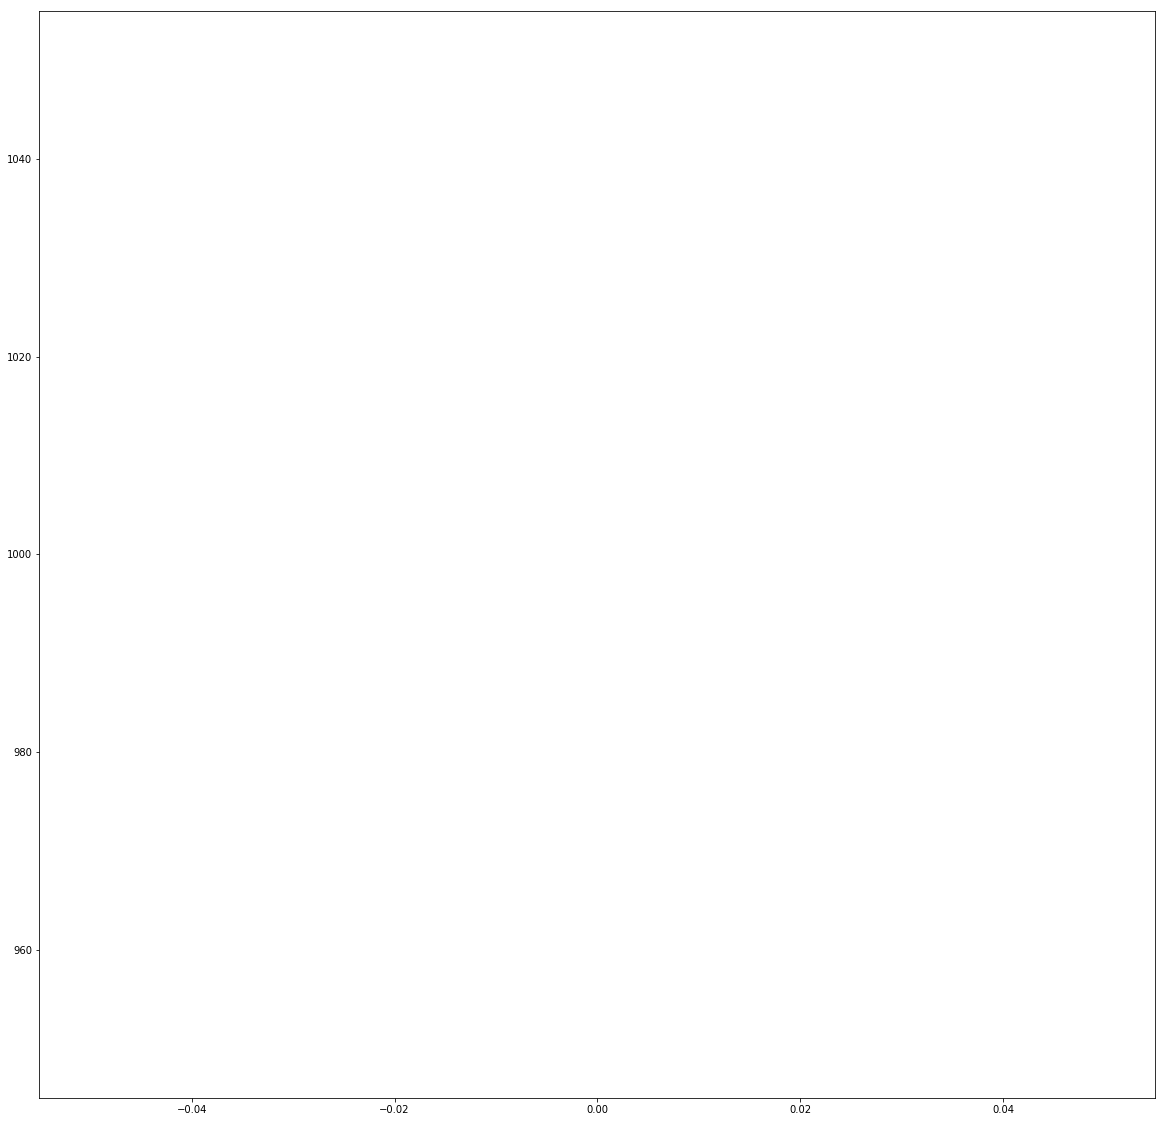

In [280]:
fig, axs = plt.subplots(1, 1, figsize=(20, 20))
axs.scatter(xx, yy)
axs.plot([0, 0], [1000, 1000], 'k-')
plt.show()

In [306]:
model = MinMaxModel()
model.fit(train, train_answers)
tr_stat = model.predict(train).merge(train_answers, on=['itemId'])
tr_stat.head()

,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true
0,6132,39,637,276,831,47,650,213,812
1,31297,25,393,126,487,18,390,122,472
2,18168,159,718,587,1074,35,713,656,1082
3,8398,53,1019,61,1028,51,1021,59,1027
4,8774,116,959,795,1317,205,792,835,1309


In [307]:
scores = tr_stat.apply(lambda x: pd.Series([x.itemId,\
                         intersection_over_union([x.Xmin, x.Ymin, x.Xmax, x.Ymax, x.Xmin_true, x.Ymin_true, x.Xmax_true, x.Ymax_true])]\
                                 , index=['itemId', 'score']), 1)
tr_stat = tr_stat.merge(scores, on=['itemId'])

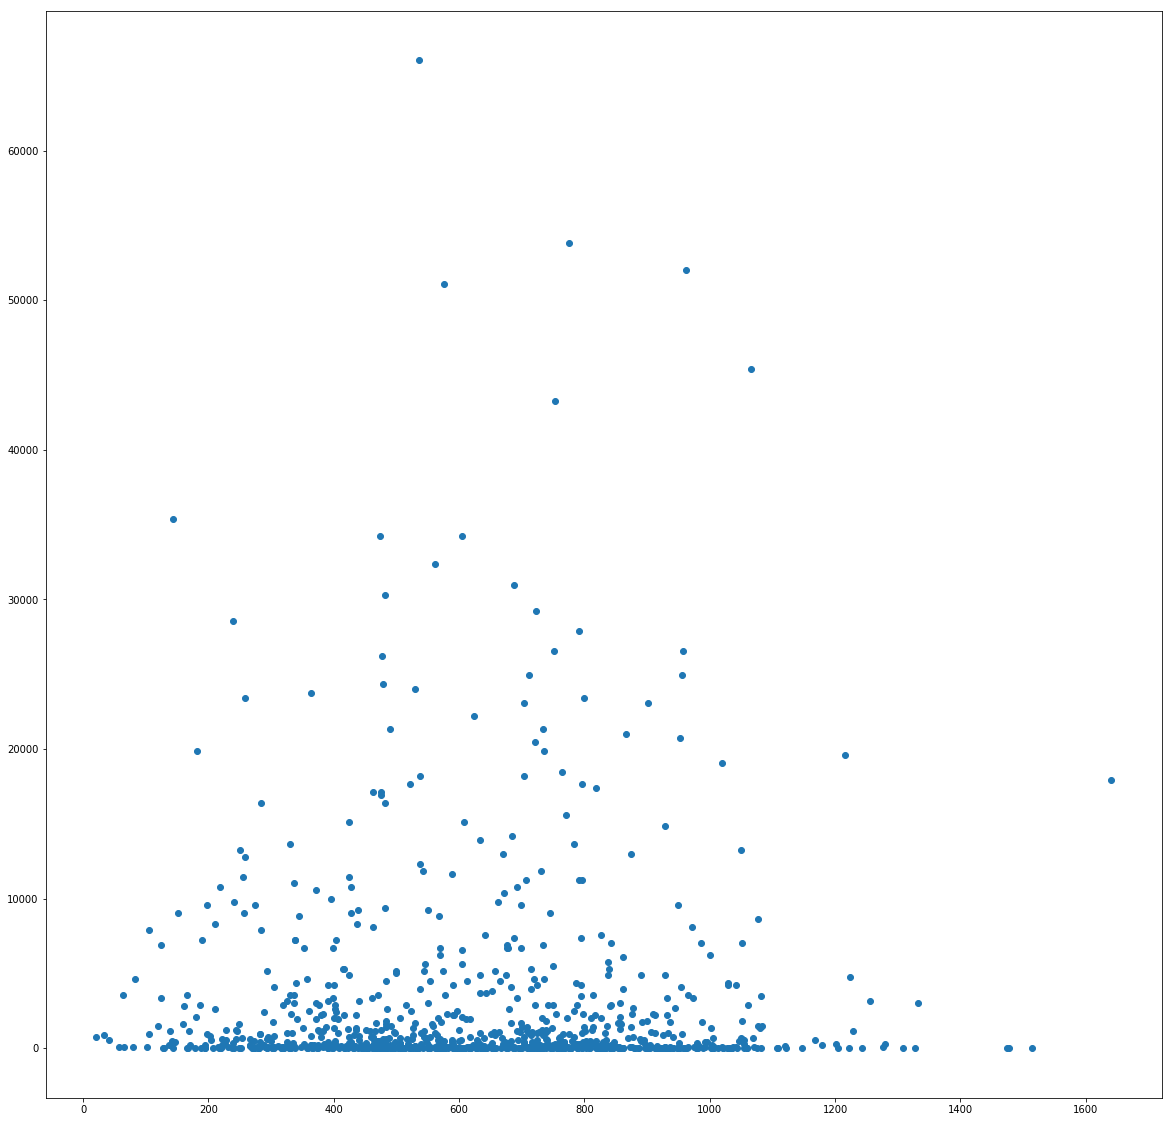

In [314]:
fig, axs = plt.subplots(1, 1, figsize=(20, 20))
axs.scatter(tr_stat.Ymin_true, (tr_stat.Ymin_true - tr_stat.Ymin)**2)
plt.show()

In [161]:
for items in split_by(train, 'itemId'):
    items = list(items.itertuples())
    items = list(map(Rect, items))
    items.sort(key=lambda a: a.x1)
    a = all(items[i - 1].contains(items[i]) for i in range(1, len(items)))
    if (a):
        print(items[0].itemId)


118
2014
5797
8374
8520
11910
13855
16332
16809
16944
17177
18713
18756
23728
25135
26967
27956
29282
31033
31749
32631
35123


In [144]:
a = list(split_by(train, 'itemId')[0].itertuples())[0]

In [147]:
str(type(a))

"<class 'pandas.core.frame.Pandas'>"

In [146]:
pd.core.frame.Pandas

AttributeError: module 'pandas.core.frame' has no attribute 'Pandas'

In [110]:
ee = []
train.groupby('itemId').apply(lambda x: ee.append(x))
ee[0]

,userId,itemId,Xmin,Ymin,Xmax,Ymax
2988,141,5,210,925,483,1255
2989,903,5,151,917,511,1160
2990,1723,5,192,914,510,1331


In [105]:
type(train)

pandas.core.frame.DataFrame

In [112]:
x1_brd = []
x2_brd = []
y1_brd = []
y2_brd = []
for items in split_by(train.join(train_answers.set_index('itemId'), on='itemId'), 'itemId'):
    itemId = items.itemId.values[0]
    rect = Rect([items.Xmin_true.values[0], items.Ymin_true.values[0], items.Xmax_true.values[0], items.Ymax_true.values[0]])
    rect.itemId = items.itemId.values[0]
    rect.userId = items.userId.values[0]
    if items.Xmin.min() == items.Xmin_true.min():
        x1_brd.append(rect)
    if items.Ymin.min() == items.Ymin_true.min():
        y1_brd.append(rect)
    if items.Xmax.max() == items.Xmax_true.max():
        x2_brd.append(rect)
    if items.Ymax.max() == items.Ymax_true.max():
        y2_brd.append(rect)
        
print(len(x1_brd), len(x2_brd), len(y1_brd), len(y2_brd))

30 24 40 31


In [131]:
','.join(map(str, list(map(lambda x: x.itemId, x1_brd)) + list(map(lambda x: x.itemId, x2_brd)) + list(map(lambda x: x.itemId, y1_brd)) + list(map(lambda x: x.itemId, y2_brd))))

'1691,4322,5312,6013,7010,9523,9813,10004,10477,10544,12016,12488,13855,15374,18374,21223,21424,22483,25135,29550,30089,30683,31033,31749,32714,32928,33357,33551,34508,34791,4117,7555,10255,10477,10867,11258,12543,13983,14575,17216,18546,18729,20558,22483,23181,25135,26374,31033,32182,32551,34362,34990,34998,35648,1095,1147,3009,4257,4752,7761,9523,13007,13855,16045,16538,17177,17190,17449,17653,18093,21231,22330,22475,22483,23031,24763,25094,25135,25142,25324,26628,26973,28987,30615,30683,31033,31086,31515,32631,32954,33665,34114,34957,35476,843,1147,3973,4408,5014,9407,10255,11212,11258,12701,13194,13386,13855,14575,15096,22391,22483,23342,23416,23609,25014,25135,25142,25324,26489,28030,28597,29498,30215,31033,34114'

In [114]:
list(map(str, x1_brd))

['Rect[14, 353]*[302, 568]',
 'Rect[23, 58]*[359, 390]',
 'Rect[48, 87]*[819, 853]',
 'Rect[48, 67]*[924, 938]',
 'Rect[15, 244]*[439, 696]',
 'Rect[48, 80]*[854, 880]',
 'Rect[59, 259]*[980, 1134]',
 'Rect[34, 240]*[636, 783]',
 'Rect[40, 121]*[719, 774]',
 'Rect[27, 111]*[552, 594]',
 'Rect[34, 50]*[709, 719]',
 'Rect[21, 631]*[321, 772]',
 'Rect[56, 62]*[1121, 1127]',
 'Rect[41, 157]*[749, 883]',
 'Rect[35, 397]*[596, 783]',
 'Rect[32, 314]*[597, 784]',
 'Rect[40, 61]*[576, 584]',
 'Rect[37, 40]*[768, 770]',
 'Rect[45, 45]*[1243, 1243]',
 'Rect[16, 534]*[342, 663]',
 'Rect[28, 310]*[428, 519]',
 'Rect[45, 123]*[1222, 1300]',
 'Rect[47, 48]*[963, 963]',
 'Rect[56, 63]*[1013, 1019]',
 'Rect[40, 151]*[753, 830]',
 'Rect[31, 46]*[846, 861]',
 'Rect[48, 263]*[897, 1058]',
 'Rect[46, 183]*[960, 1062]',
 'Rect[30, 310]*[857, 1205]',
 'Rect[49, 280]*[890, 1012]']

In [122]:
(train_answers.Xmin_true <= 59).mean()

0.5418875927889714

In [123]:
(train.Xmin <= 59).mean()

0.3509462244706764

In [105]:
str(sorted(list(map(lambda a: a[1], x1_brd))))

'[14, 15, 16, 21, 23, 27, 28, 30, 31, 32, 34, 34, 35, 37, 40, 40, 40, 41, 45, 45, 46, 47, 48, 48, 48, 48, 49, 56, 56, 59]'

In [106]:
str(sorted(list(map(lambda a: a[1], x2_brd))))

'[36, 38, 39, 43, 45, 46, 47, 54, 55, 55, 56, 61, 75, 75, 93, 95, 95, 97, 181, 206, 209, 214, 239, 299]'

In [107]:
str(sorted(list(map(lambda a: a[1], y1_brd))))

'[16, 22, 22, 23, 25, 29, 31, 32, 33, 33, 33, 35, 37, 37, 38, 40, 40, 41, 43, 43, 45, 45, 46, 47, 48, 48, 51, 52, 53, 53, 54, 55, 56, 57, 58, 60, 82, 85, 101, 103]'

In [108]:
str(sorted(list(map(lambda a: a[1], y2_brd))))

'[31, 38, 44, 45, 48, 48, 57, 58, 60, 62, 74, 79, 83, 94, 95, 98, 100, 100, 102, 105, 133, 148, 176, 177, 179, 222, 243, 260, 323, 354, 528]'

In [98]:
train_answers.shape

(943, 5)

In [110]:
sorted(train_answers.Xmin_true.unique())

[-1,
 0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 111,
 112,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 127,
 128,
 129,
 130,
 131,
 132,
 135,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 153,
 155,
 156,
 157,
 158,
 159,
 160,
 162,
 163,
 164,
 165,
 167,
 169,
 172,
 173,
 174,
 175,
 176,
 178,
 181,
 186,
 187,
 189,
 193,
 195,
 197,
 198,
 199,
 201,
 202,
 204,
 205,
 207,
 209,
 210,
 211,
 212,
 214,
 215,
 216,
 218

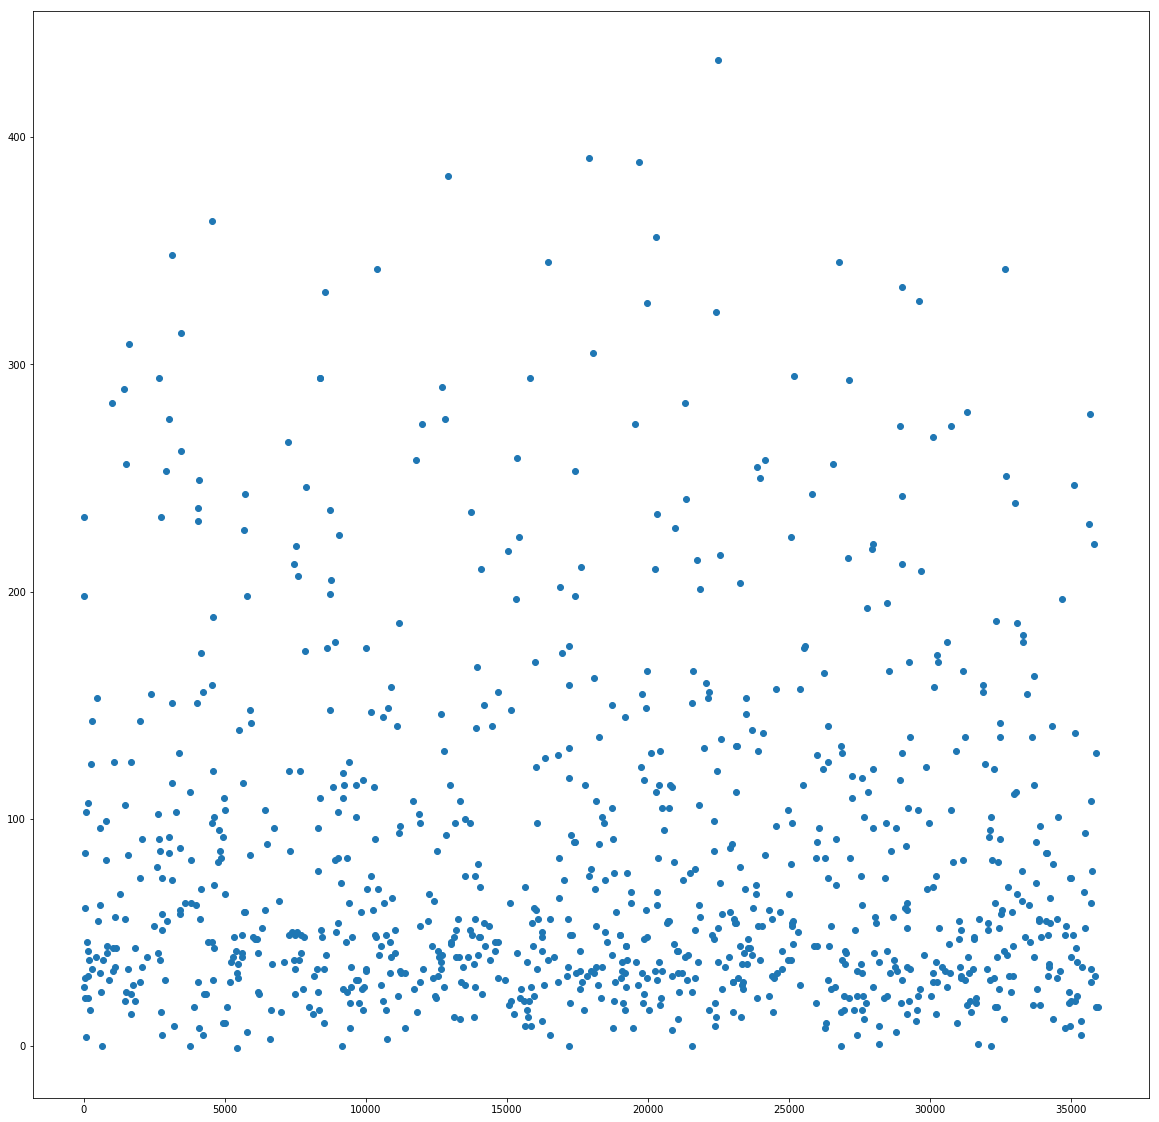

In [120]:
fig, axs = plt.subplots(1, 1, figsize=(20, 20))
axs.scatter(train_answers.itemId, train_answers.Xmin_true)
plt.show()